## Predict whether or not will click on an ad based on the features gather for a particular user.

In [4]:
'Daily Time Spent on Site': consumer time on site in minutes
'Age': cutomer age in years
'Area Income': Avg. Income of geographical area of consumer
'Daily Internet Usage': Avg. minutes a day consumer is on the internet
'Ad Topic Line': Headline of the advertisement
'City': City of consumer
'Male': Whether or not consumer was male
'Country': Country of consumer
'Timestamp': Time at which consumer clicked on Ad or closed window
'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [4]:
import pandas as pd # Data analysis and manipulation tool
import numpy as np # A scientific computing with Python
import matplotlib.pyplot as plt # For interactive visualization 
import seaborn as sns # Data visualization library based on matplotlib. It provides a high-level interface

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Logistic-Regression/master/advertisement_data.csv')

In [8]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36:18,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [14]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<Axes: xlabel='Male', ylabel='count'>

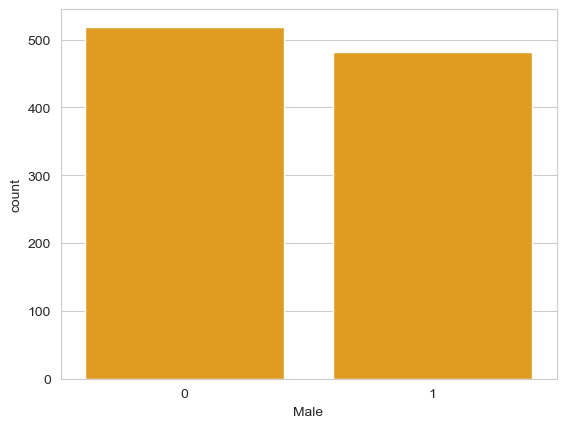

In [138]:
sns.countplot(x ='Male', data=data,color = 'orange')

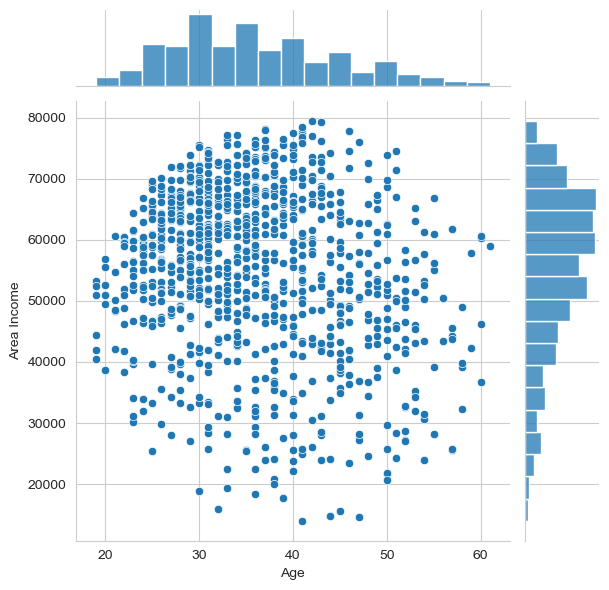

In [38]:
sns.jointplot(x='Age', y ='Area Income',data=data)
# Joint plot for 'Area Income' and 'Age'
# Plots two variables with bivariate and univariate graphs

#From the jointplot#
#with geographical areas that have higher average incomes. 
#Additionally, as customer age increases, the average income in their corresponding geographical area appears to decline slightly. This indicates a mild negative correlation between customer age 
#and the average income of their area, which is further illustrated in the regression plot below.

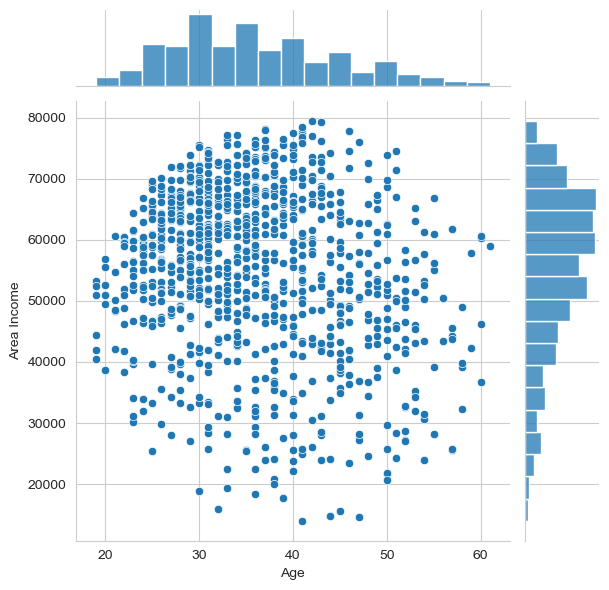

In [38]:
sns.jointplot(x='Age', y ='Area Income',data=data)
# Joint plot for 'Area Income' and 'Age'
# Plots two variables with bivariate and univariate graphs

#From the jointplot#
#with geographical areas that have higher average incomes. 
#Additionally, as customer age increases, the average income in their corresponding geographical area appears to decline slightly. This indicates a mild negative correlation between customer age 
#and the average income of their area, which is further illustrated in the regression plot below.

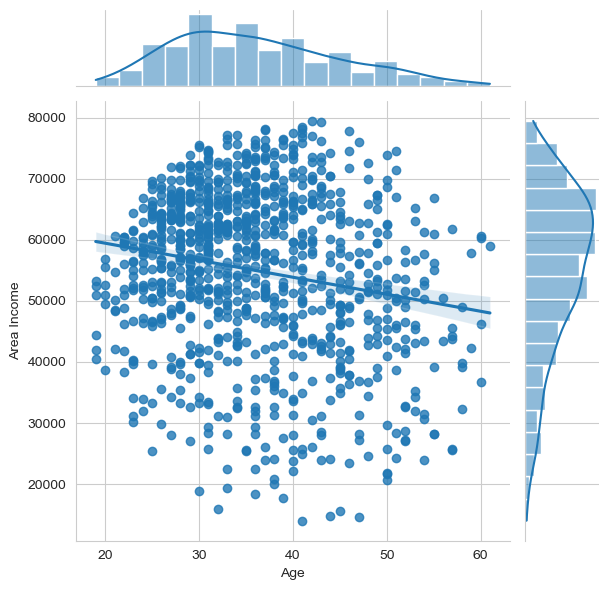

In [40]:
sns.jointplot(x='Age',y='Area Income',data=data, kind = 'reg') # with regression line in the scatter plot and kernel density curve in both histograms

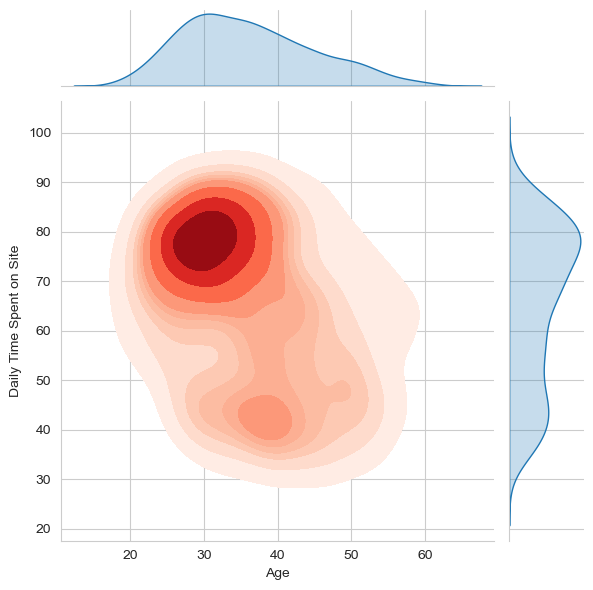

In [44]:
#Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.
sns.jointplot(
    x='Age',y='Daily Time Spent on Site',data=data,kind='kde',
    fill=True,        # Fill the contours for better visibility (available in seaborn ≥0.11)
    cmap='Reds'       # Customize color map
)

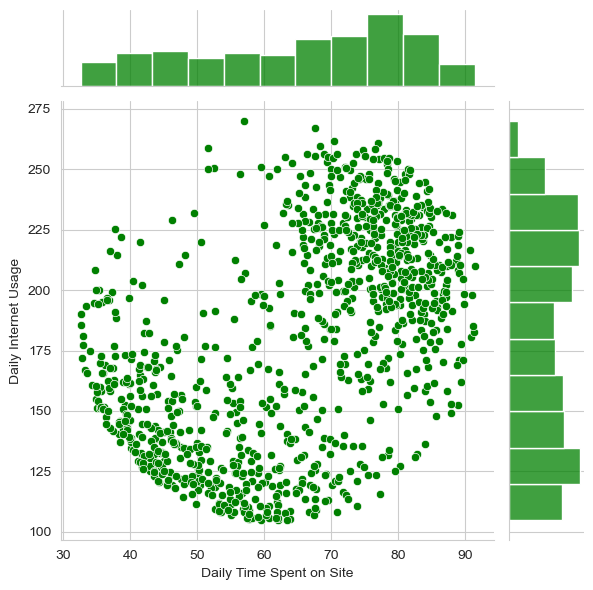

In [46]:
#Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'

sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=data,color='green')

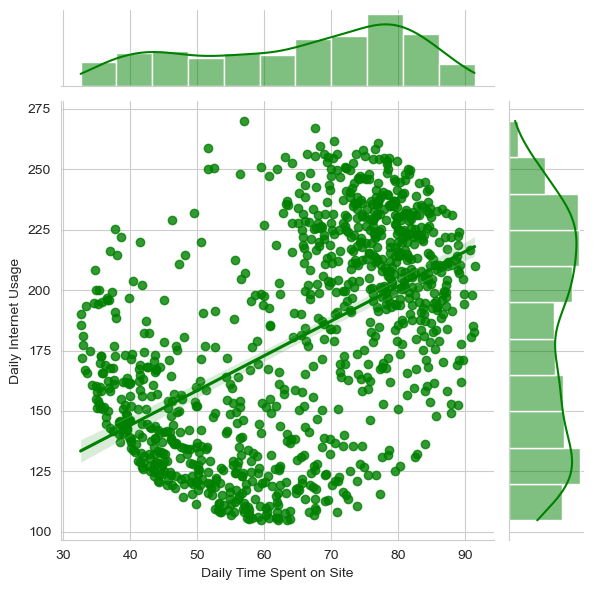

In [48]:
#Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'

sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=data,color='green',kind ='reg')
#There are very few customers with less internet usage than the average internet use. Customers who spent 35 to 65 minutes 
#on the site are averagely less than 175 minutes on the internet and those who spent 70 to 85 minutes on the site are 
#averagely more than 180-185 minutes on the internet.

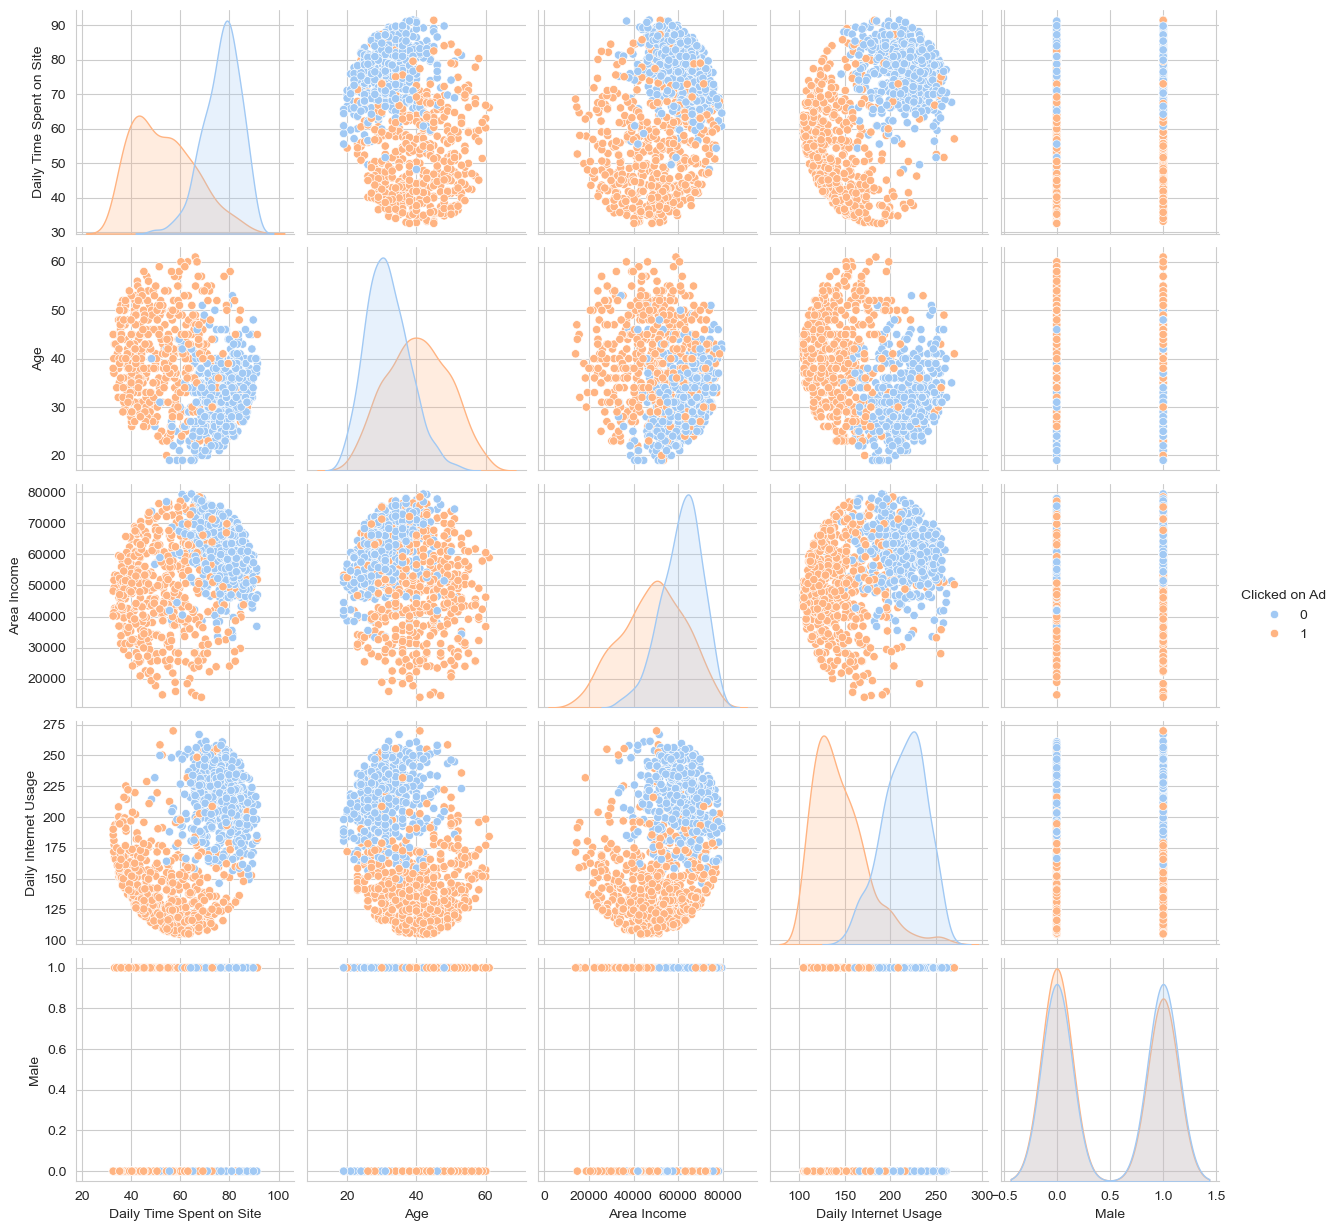

In [66]:
#This function plots pairwise relationships between all numeric columns in the dataset. It creates a grid of scatter 
#plots (for each feature pair) and histograms or KDE plots on the diagonal (for individual feature distributions).
sns.pairplot(data,hue = 'Clicked on Ad', palette = 'pastel')

In [72]:
# We have freedom to chose features on which we want to train our model
x = data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']] # feature columns
y = data['Clicked on Ad'] # target column

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [82]:
#Train
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 123)

In [86]:
print("Original shape of dataset: {}".format(data.shape)) # shape of original dataset
print("Shape of training dataset: {}".format(x_train.shape)) # shape of training dataset after split
print("Shape of testing dataset: {}".format(x_test.shape)) # shape of testing dataset after split

Original shape of dataset: (1000, 10)
Shape of training dataset: (700, 5)
Shape of testing dataset: (300, 5)


In [92]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [94]:
# Prediction
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1], d

In [96]:
len(y_pred)

300

In [ ]:
#Evaluation Metrics

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)


In [118]:
#1. Accuracy -Proportion of correct predictions.Good when classes are balanced.


from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

##Our model is predicting 97.3% correct results.

0.9733333333333334

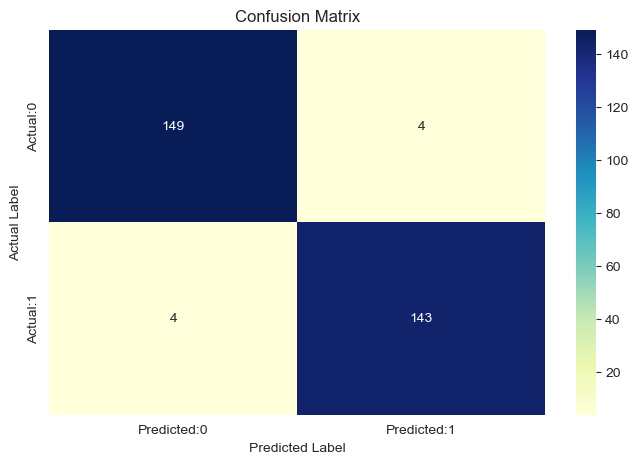

In [146]:


#2. Confusion Matrix-Gives us True Positives, False Positives, True Negatives, and False Negatives.

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create labeled DataFrame
conf_matrix = pd.DataFrame(data=cm,
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [122]:
#3.Evaluation-  Precision, Recall, and F1 Score.Useful for imbalanced datasets.
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)

0.9727891156462585

In [124]:


#4. ROC Curve and AUC (Area Under Curve)-Measures how well the model distinguishes between classes.

from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_test, y_pred)  # predicted probabilities



0.9733226623982927

In [126]:

#5. Log Loss (Cross-Entropy Loss).Penalizes confident but wrong predictions.

from sklearn.metrics import log_loss
log_loss(y_test, y_pred)

0.9611640903764577

In [148]:
cm

array([[149,   4],
       [  4, 143]], dtype=int64)